# импорт библиотек


In [73]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Загрузка датасета

In [24]:
df = pd.read_csv(
    filepath_or_buffer='SF_Mandarin_dataset_ver3_csv.csv',
    sep=';',
    index_col='SkillFactory_Id',
    parse_dates=['BirthDate', 'JobStartDate'])

In [25]:
df.head(5)

,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,Family status,...,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
SkillFactory_Id,,,,,,,,,,,,,,,,,,,,,
1.0,1988-07-21,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01,начальник п,180000.0,90000.0,0.0,Никогда в браке не состоял(а),...,0.0,success,success,success,success,denied,77.0,137000.0,18.0,Furniture
2.0,1998-01-16,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01,директор,200000.0,60000.0,0.0,Никогда в браке не состоял(а),...,0.0,success,denied,success,denied,success,27.0,33000.0,6.0,Fitness
3.0,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),...,0.0,denied,denied,success,success,success,19.0,165000.0,24.0,Medical_services
4.0,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),...,0.0,success,denied,success,success,success,34.0,67000.0,12.0,Education
5.0,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),...,0.0,success,denied,success,success,success,75.0,36000.0,6.0,Furniture


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 8787 entries, 1.0 to nan
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          6603 non-null   datetime64[ns]
 1   education          6603 non-null   object        
 2   employment status  6603 non-null   object        
 3   Value              6523 non-null   object        
 4   JobStartDate       6494 non-null   datetime64[ns]
 5   Position           6494 non-null   object        
 6   MonthProfit        6603 non-null   float64       
 7   MonthExpense       6603 non-null   float64       
 8   Gender             6566 non-null   float64       
 9   Family status      6566 non-null   object        
 10  ChildCount         6566 non-null   float64       
 11  SNILS              6603 non-null   float64       
 12  BankA_decision     6603 non-null   object        
 13  BankB_decision     6603 non-null   object        
 14  BankC

# Исследовательский анализ данных

кол-во дубликатов

In [27]:
df.duplicated().sum()

2183

Посмотрим на категориальные и числовые столбцы

In [28]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['education', 'employment status', 'Value', 'Position', 'Family status', 'BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision', 'Goods_category'] 
 Число столблцов =  11
Числовые данные:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_amount', 'Loan_term'] 
 Число столблцов =  10


Статистика


In [29]:
df.describe()

,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,Merch_code,Loan_amount,Loan_term
count,6.603000e+03,6603.000000,6566.000000,6566.000000,6603.000000,6603.000000,6603.000000,6603.000000
mean,1.484528e+05,26234.063153,0.309625,0.097320,0.350295,38.794184,76362.108133,12.117219
std,7.742496e+04,22557.993167,0.462374,0.423026,0.477099,23.929860,50978.500496,5.996582
min,5.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,4000.000000,6.000000
25%,1.000000e+05,15000.000000,0.000000,0.000000,0.000000,18.000000,35000.000000,6.000000
50%,1.450000e+05,22500.000000,0.000000,0.000000,0.000000,36.000000,68000.000000,12.000000
75%,1.900000e+05,31000.000000,1.000000,0.000000,1.000000,63.000000,101000.000000,18.000000
max,1.200000e+06,500000.000000,1.000000,5.000000,1.000000,80.000000,200000.000000,24.000000


Рассмотрим гистограммы (распределение) значений по каждому числовому признаку (столбцу)

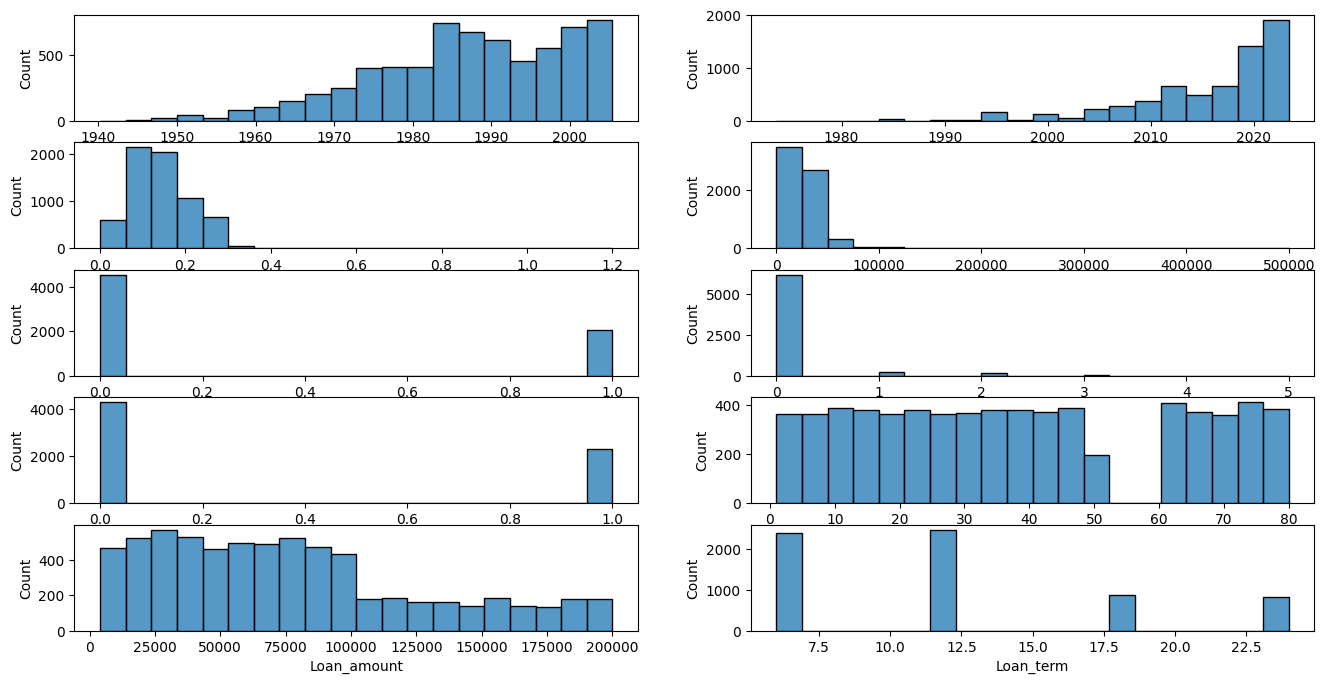

In [30]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

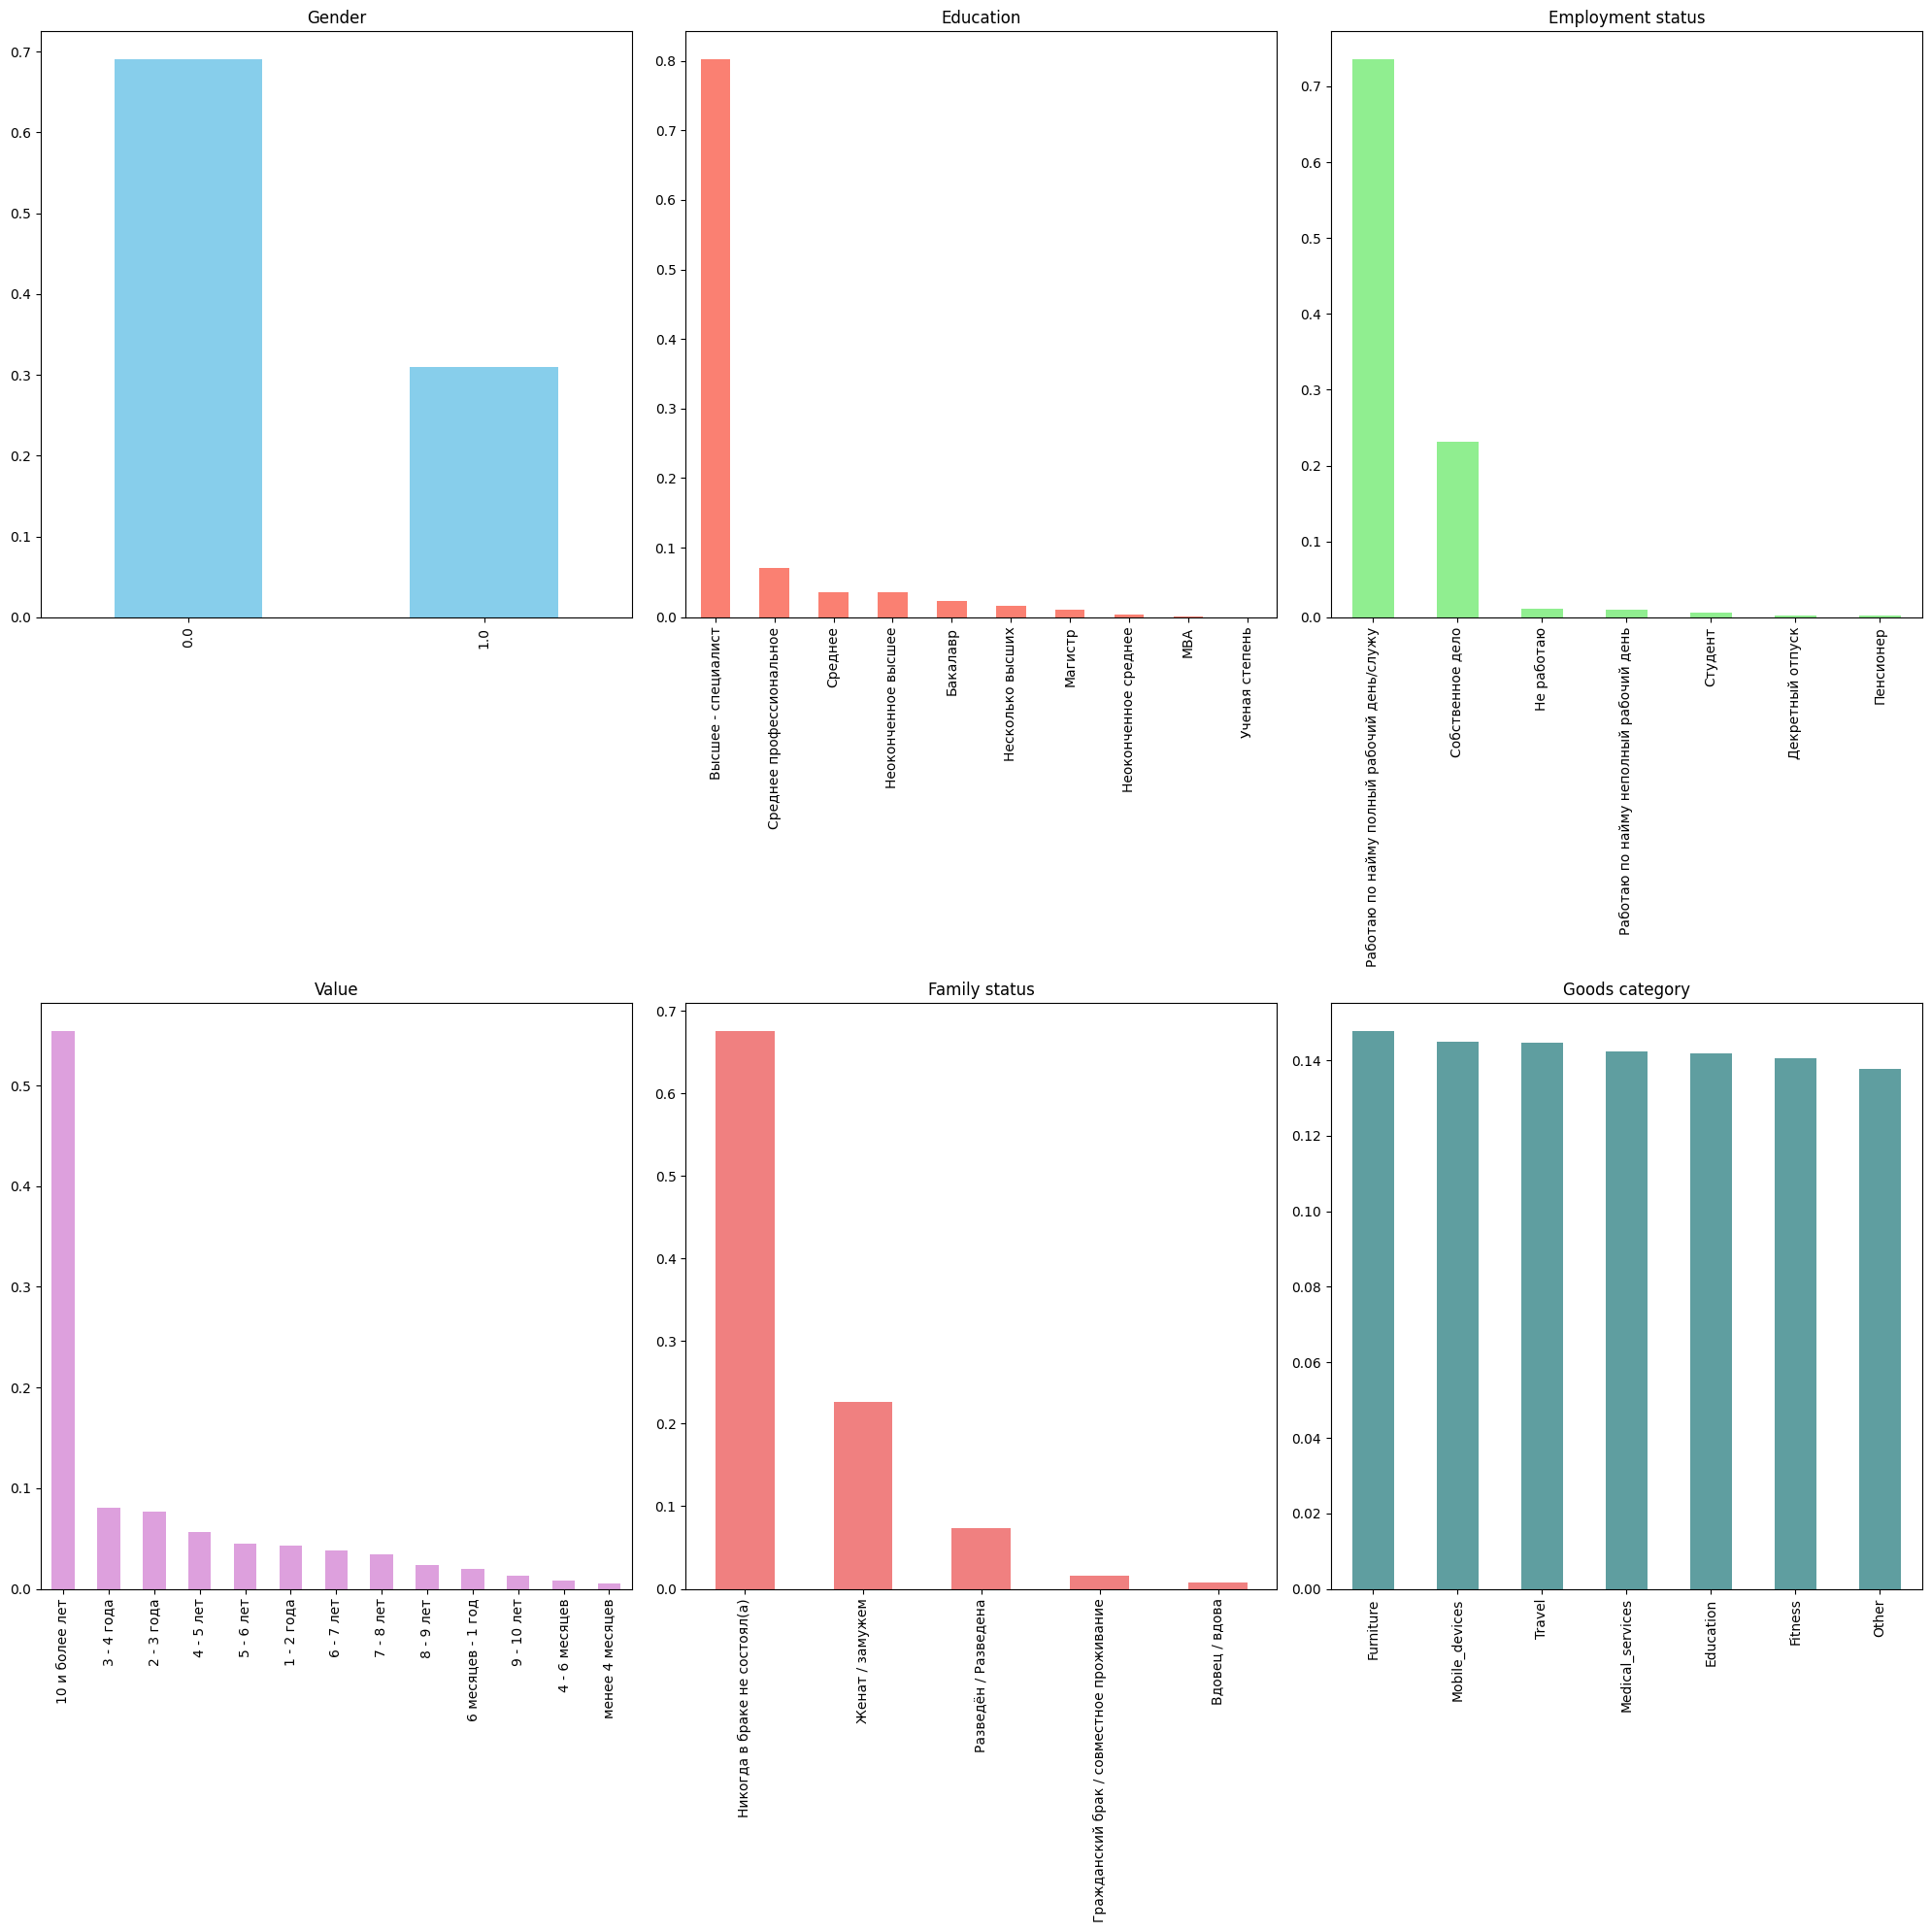

In [33]:

plt.figure(figsize=(20, 20))

colors = ['skyblue', 'salmon', 'lightgreen', 'plum', 'lightcoral', 'cadetblue']

plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(title='Gender', color=colors[0])

plt.subplot(232)
df['education'].value_counts(normalize=True).plot.bar(title='Education', color=colors[1])

plt.subplot(233)
df['employment status'].value_counts(normalize=True).plot.bar(title='Employment status', color=colors[2])

plt.subplot(234)
df['Value'].value_counts(normalize=True).plot.bar(title='Value', color=colors[3])

plt.subplot(235)
df['Family status'].value_counts(normalize=True).plot.bar(title='Family status', color=colors[4])

plt.subplot(236)
df['Goods_category'].value_counts(normalize=True).plot.bar(title='Goods category', color=colors[5])

plt.tight_layout()
plt.show()



Из приведенных выше графиков можно сделать вывод, что:

70% заявителей в наборе данных - мужчины.
Около 80% заявителей имеют высшее образование.
Около 55% имеют опыт работы более 10 лет.
Около 66% заявителей никогда не были женаты.
Около 75% заявителей в наборе данных работают полный рабочий день.
Категории товаров, на которые были поданы заявки на получение займов, распределены поровну.

Посмотрим зависимости параметров БанкаА от других параметров

<Figure size 1500x1500 with 0 Axes>

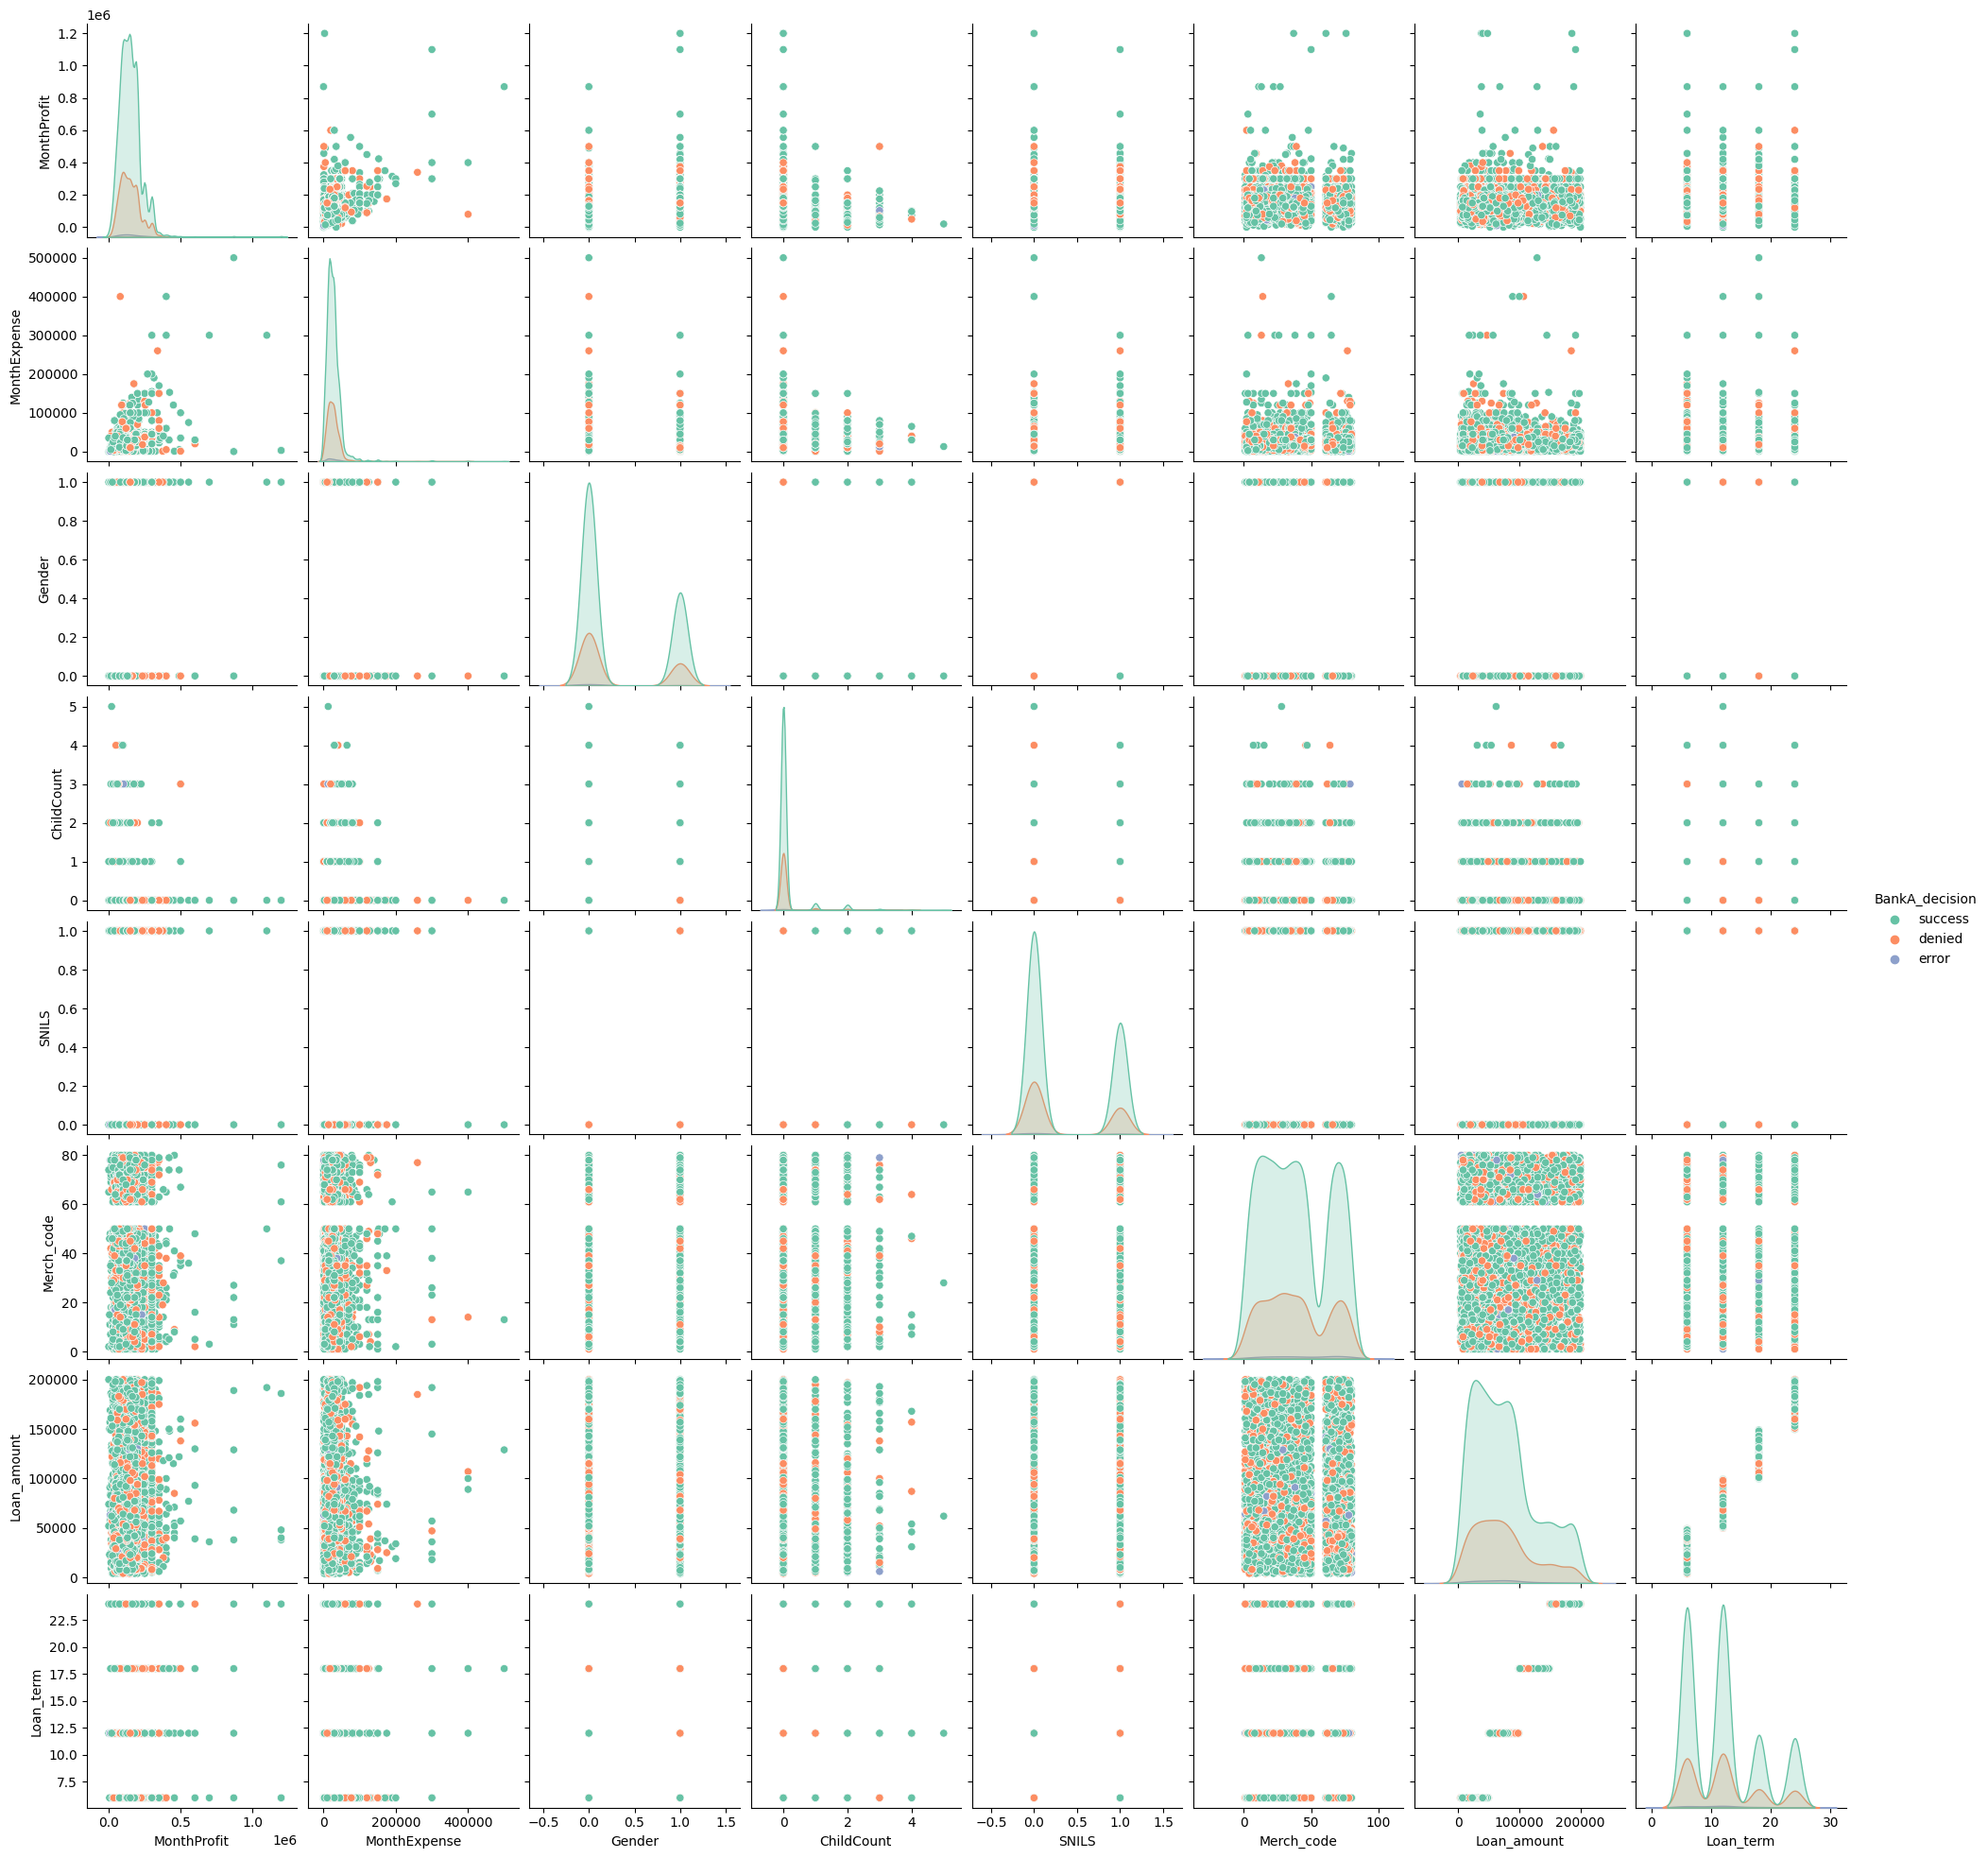

In [34]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df,
             hue ='BankA_decision',
             palette = "Set2");

<Figure size 1500x1500 with 0 Axes>

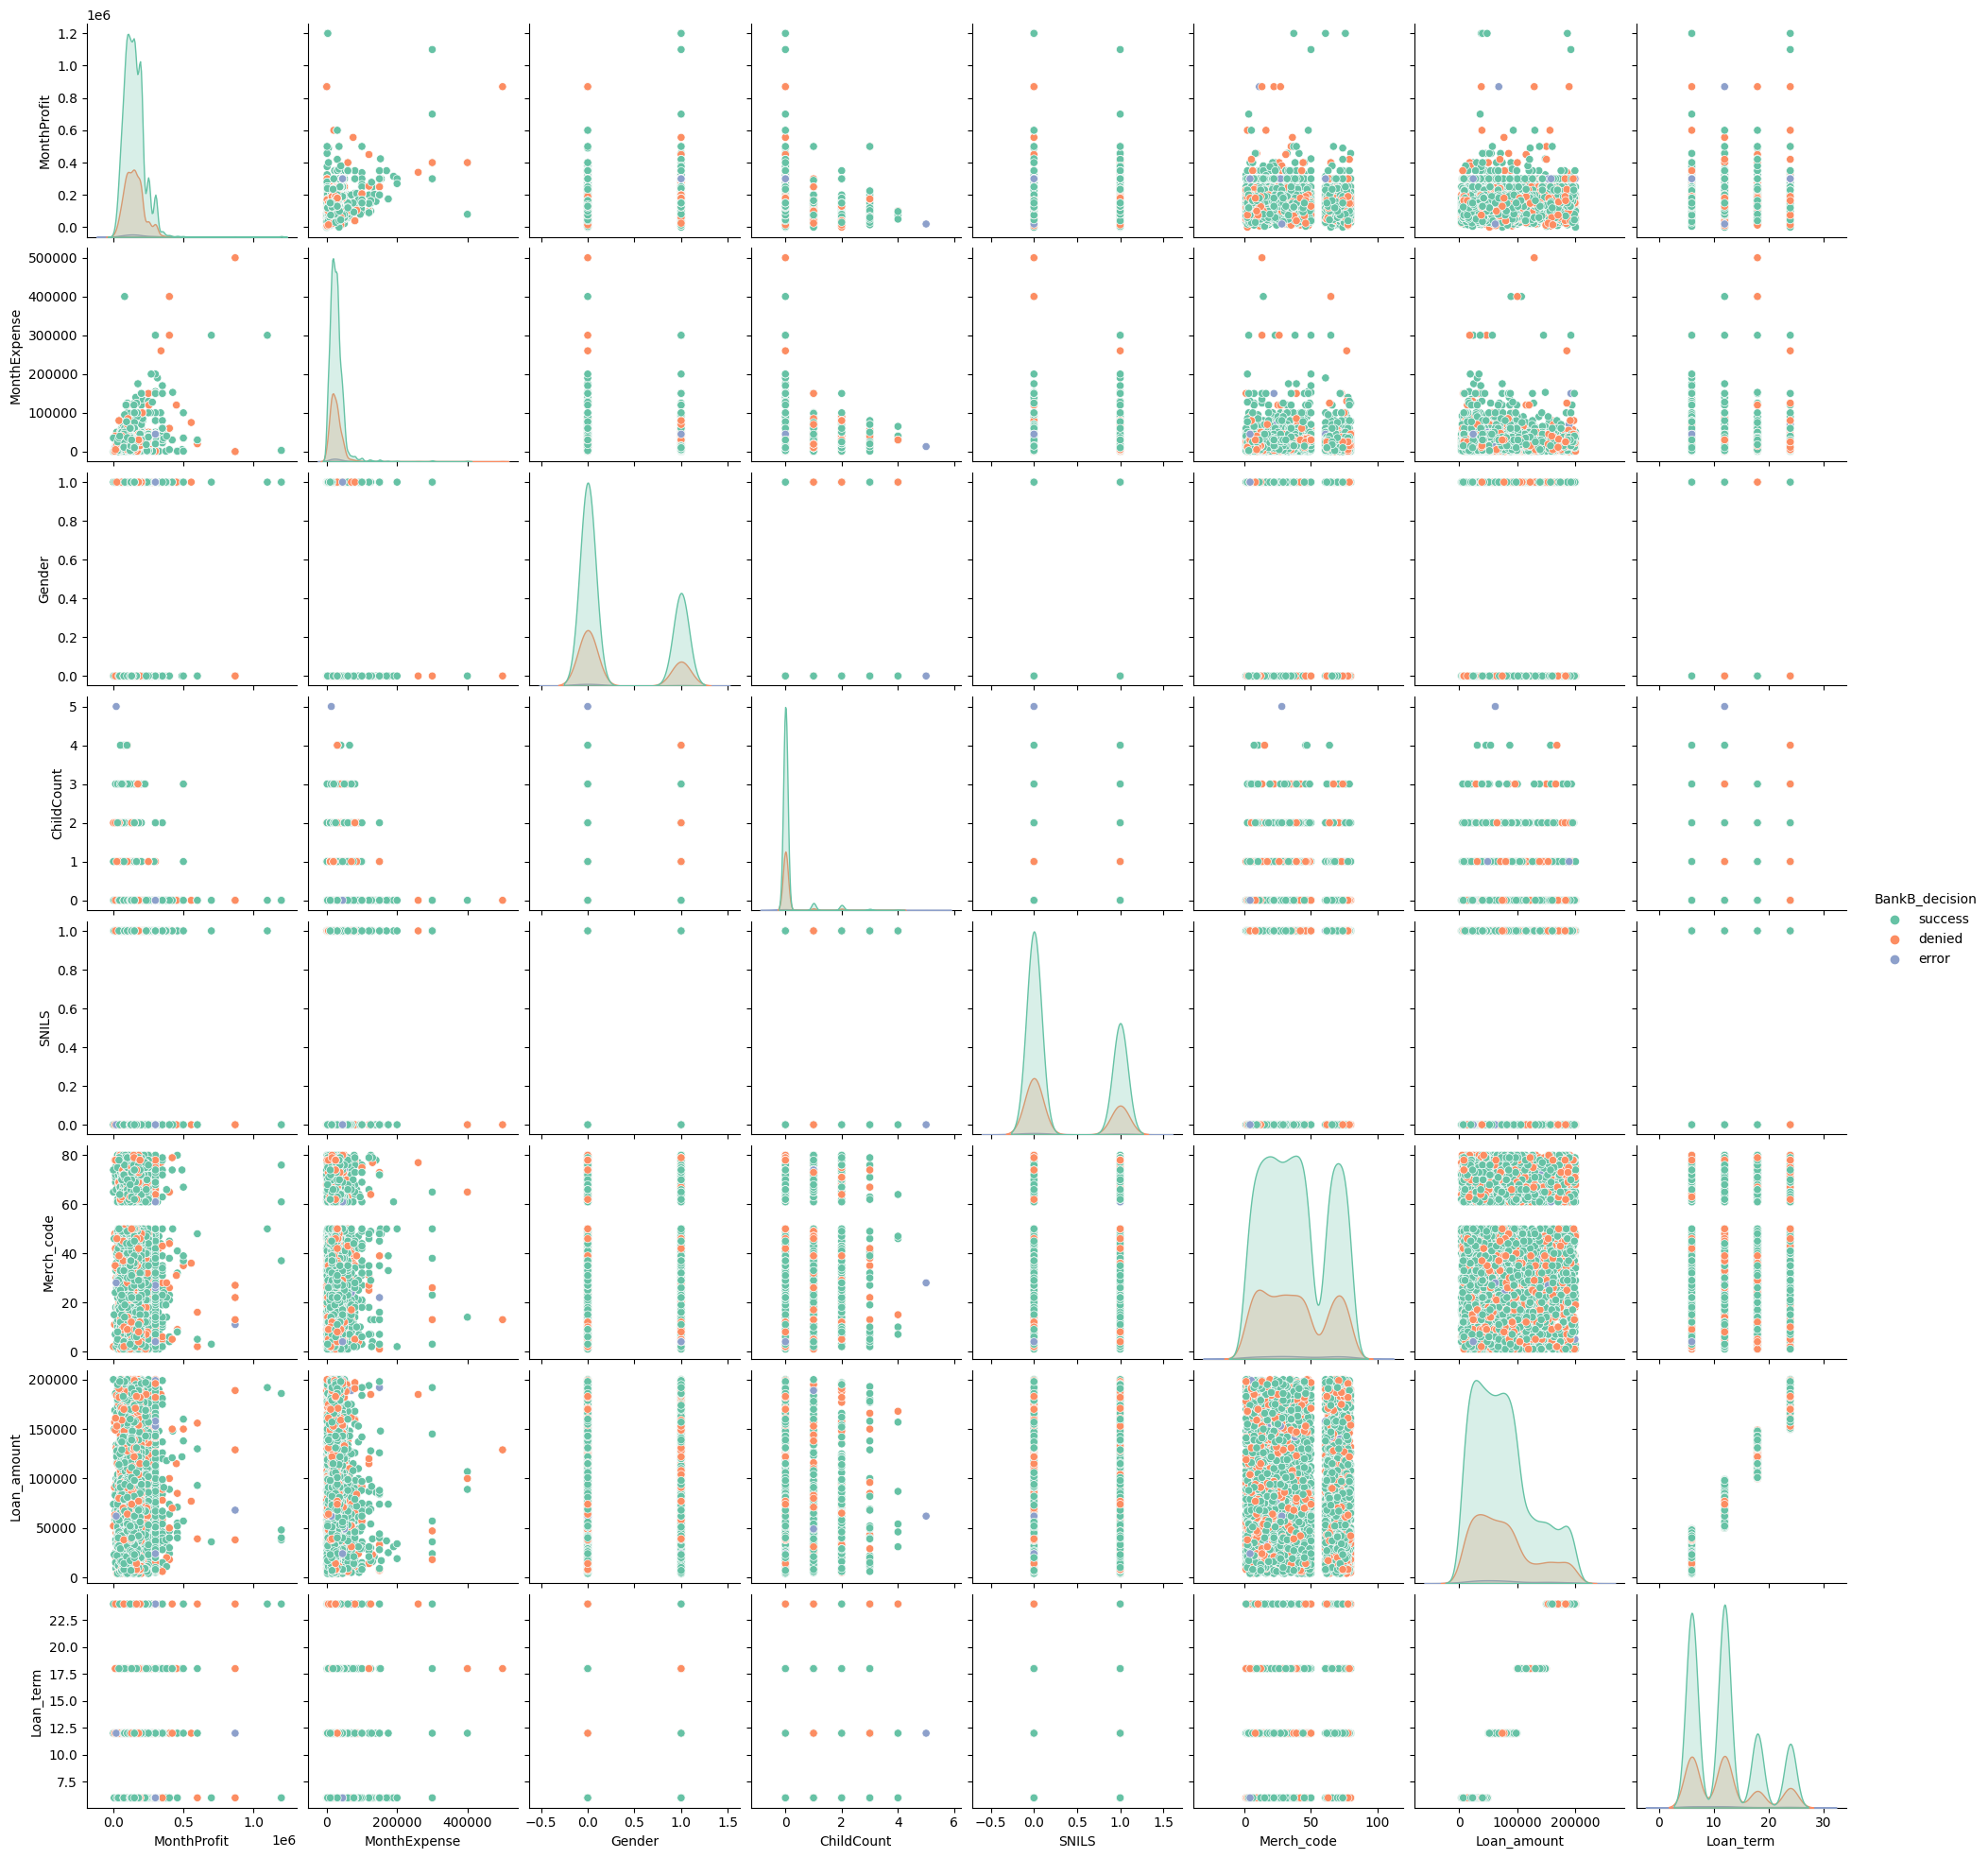

In [36]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df,
             hue ='BankB_decision',
             palette = "Set2");

Таблица корреляции

In [37]:
cm = sns.color_palette("flare", as_cmap=True)

df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

<ipython-input-37-7c84bab269b5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)


,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,Merch_code,Loan_amount,Loan_term
MonthProfit,1.000000,0.383227,0.003556,-0.137135,-0.046841,-0.000929,0.007741,0.003550
MonthExpense,0.383227,1.000000,0.016176,0.085543,0.137536,-0.001799,-0.006435,-0.011478
Gender,0.003556,0.016176,1.000000,0.007904,0.011611,-0.004606,0.002393,-0.000357
ChildCount,-0.137135,0.085543,0.007904,1.000000,0.153691,-0.004619,-0.000630,0.003611
SNILS,-0.046841,0.137536,0.011611,0.153691,1.000000,0.002070,-0.012278,-0.014354
Merch_code,-0.000929,-0.001799,-0.004606,-0.004619,0.002070,1.000000,0.016864,0.014234
Loan_amount,0.007741,-0.006435,0.002393,-0.000630,-0.012278,0.016864,1.000000,0.961031
Loan_term,0.003550,-0.011478,-0.000357,0.003611,-0.014354,0.014234,0.961031,1.000000


# тестируем признаки

In [50]:
def CarierLevelDig_feature_creator(df:pd.DataFrame)->pd.Series:
    """
     Числовой признак "Карьерный уровень клиента", чем выше тем лучше.
     Состав выходной колонки данных примерно такой:
     1    2293
     2    2137
     3    2014
     5     907
     7     533
     4     523
     9     226
     8     124
     6      30
    """

    f1 = CarierLevel_feature_creator_v2(df)
    rate_dict={
     'НЕРАЗОБРАНО': 2,
     'НЕТ_ДАННЫХ': 1,
     'НИЗШЕЕ_ЗВЕНО': 2,
     'САМ': 3,
     'ИП': 3,
     'СРЕДНЕЕ_ЗВЕНО': 3,
     'МЕН2': 4,
     'МЕН1': 5,
     'ЗАМНАЧ': 6,
     'ДИР2': 7,
     'ЗАМДИР': 8,
     'ДИР1': 9}

    f1 = f1.replace(rate_dict, regex=True)
    return f1

In [51]:
def CarierVelocity_feature_creator(df:pd.DataFrame)->pd.Series:
   """
   Признак "Скорость карьерного роста" клиента (Отношение карьерного уровня
   к длительности карьеры).

   Состав выходной колонки данных примерно такой:
   0       0.487707
   1       7.019231
   2       0.388711
   3       0.388711
   4       0.388711
          ...
   8782         NaN
   8783         NaN
   8784         NaN
   8785         NaN
   8786         NaN
   """

   df = df.copy()
   rates = CarierLevelDig_feature_creator(df)
   td = (pd.to_datetime("today") - df['JobStartDate']).dt.days/365
   carier_velocity = rates/td
   return carier_velocity

In [54]:
from datetime import date


from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [55]:
def cat_num_split(df: pd.DataFrame) -> tuple:
    '''Ищем категориальные и числовые признаки в датафрейме'''

    cat_columns = []
    num_columns = []

    for column_name in df.columns:
        if (df[column_name].dtypes == object):
            cat_columns += [column_name]
        else:
            num_columns += [column_name]

    print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))
    print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

    return cat_columns, num_columns

def Age_feature_creator(
    df: pd.DataFrame,
    ) -> pd.Series:
    '''Создаем признак "возраст"'''
    df = df.copy()

    return date.today().year - df['BirthDate'].dt.year


def Num_value_feature_creator(
    df: pd.DataFrame,
    ) -> pd.Series:
    '''Создаем признак "стаж работы" из даты начала работы'''
    df = df.copy()

    return date.today().year - df['JobStartDate'].dt.year


def Monthly_credit_payment(
    df: pd.DataFrame,
    ) -> pd.Series:
    '''Создаем функцию расчета ежемесячного платёжа'''
    df = df.copy()

    return df['Loan_amount'] // df['Loan_term']


def Payment_to_income(
    df: pd.DataFrame,
    ) -> pd.Series:
    '''Создаем признак "показатель долговой нагрузки"'''
    df = df.copy()
    monthly_payment = Monthly_credit_payment(df) + df['MonthExpense']

    return monthly_payment / df['MonthProfit']

In [57]:
# Загружаю датафрейм
df = pd.read_csv(
    filepath_or_buffer='SF_Mandarin_dataset_ver3_csv.csv',
    sep=';',
    index_col='SkillFactory_Id',
    parse_dates=['BirthDate', 'JobStartDate']
    )
df['Age'] = Age_feature_creator(df)
df['Num_value'] = Num_value_feature_creator(df)
# Убиваю столбцы с датами
df.drop(['BirthDate', 'JobStartDate'], axis='columns', inplace=True)
# Создаю простые_заполнятели от SKlearn
cat_imputer = SimpleImputer(strategy='most_frequent') # Заполнение наиболее частыми значениями для категориальных столбцов
num_imputer = SimpleImputer(strategy='median') # Заполнение медианой для числовых столбцов
# Ищу категориальные и числовые столбцы
cat_columns, num_columns = cat_num_split(df)
# Заполняю пропуски простыми заполнятелями
df[cat_columns] = cat_imputer.fit_transform(df[cat_columns])
df[num_columns] = num_imputer.fit_transform(df[num_columns])
# Добавляю наши новые фичи, которые мы придумали
df['Carier_Level'] = CarierLevel_feature_creator_v2(df)
df['Payment_to_income'] = Payment_to_income(df)
# Сбрасываю те фичи, которые участвовали в создании новых фич
df.drop(['MonthProfit', 'MonthExpense', 'Loan_amount', 'Loan_term'], axis='columns', inplace=True)
# Смотрим на датафрейм
df.info()

categorical columns:	  ['education', 'employment status', 'Value', 'Position', 'Family status', 'BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision', 'Goods_category'] 
 len =  11
numerical columns:	  ['MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_amount', 'Loan_term', 'Age', 'Num_value'] 
 len =  10
<class 'pandas.core.frame.DataFrame'>
Float64Index: 8787 entries, 1.0 to nan
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   education          8787 non-null   object 
 1   employment status  8787 non-null   object 
 2   Value              8787 non-null   object 
 3   Position           8787 non-null   object 
 4   Gender             8787 non-null   float64
 5   Family status      8787 non-null   object 
 6   ChildCount         8787 non-null   float64
 7   SNILS              8787 non-null   float64
 8   BankA_decision     8787 non-n

In [61]:
df

,education,employment status,Value,Position,Gender,Family status,ChildCount,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Goods_category,Age,Num_value,Carier_Level,Payment_to_income
SkillFactory_Id,,,,,,,,,,,,,,,,,,,
1.0,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,начальник п,0.0,Никогда в браке не состоял(а),0.0,0.0,success,success,success,success,denied,77.0,Furniture,35.0,10.0,МЕН1,0.542283
2.0,Высшее - специалист,Собственное дело,1 - 2 года,директор,0.0,Никогда в браке не состоял(а),0.0,0.0,success,denied,success,denied,success,27.0,Fitness,25.0,1.0,ДИР2,0.327500
3.0,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,ДИРЕКТОР,1.0,Никогда в браке не состоял(а),0.0,0.0,denied,denied,success,success,success,19.0,Medical_services,51.0,18.0,ДИР2,0.172917
4.0,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,ДИРЕКТОР,1.0,Никогда в браке не состоял(а),0.0,0.0,success,denied,success,success,success,34.0,Education,51.0,18.0,ДИР2,0.168610
5.0,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,ДИРЕКТОР,1.0,Никогда в браке не состоял(а),0.0,0.0,success,denied,success,success,success,75.0,Furniture,51.0,18.0,ДИР2,0.170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ,0.0,Никогда в браке не состоял(а),0.0,0.0,success,success,success,success,success,36.0,Furniture,35.0,5.0,ИП,0.194248
NaN,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ,0.0,Никогда в браке не состоял(а),0.0,0.0,success,success,success,success,success,36.0,Furniture,35.0,5.0,ИП,0.194248
NaN,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ,0.0,Никогда в браке не состоял(а),0.0,0.0,success,success,success,success,success,36.0,Furniture,35.0,5.0,ИП,0.194248


<ipython-input-69-af94f2ec705e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Gender,ChildCount,SNILS,Merch_code,Age,Num_value,Payment_to_income
Gender,1.000000,0.044106,0.121244,0.014006,-0.038446,0.015188,-0.003048
ChildCount,0.044106,1.000000,0.183095,0.002043,0.033072,-0.025743,0.010400
SNILS,0.121244,0.183095,1.000000,0.021920,-0.143121,-0.116576,-0.000624
Merch_code,0.014006,0.002043,0.021920,1.000000,0.022653,0.010171,0.018453
Age,-0.038446,0.033072,-0.143121,0.022653,1.000000,0.527954,0.003782
Num_value,0.015188,-0.025743,-0.116576,0.010171,0.527954,1.000000,0.003587
Payment_to_income,-0.003048,0.010400,-0.000624,0.018453,0.003782,0.003587,1.000000


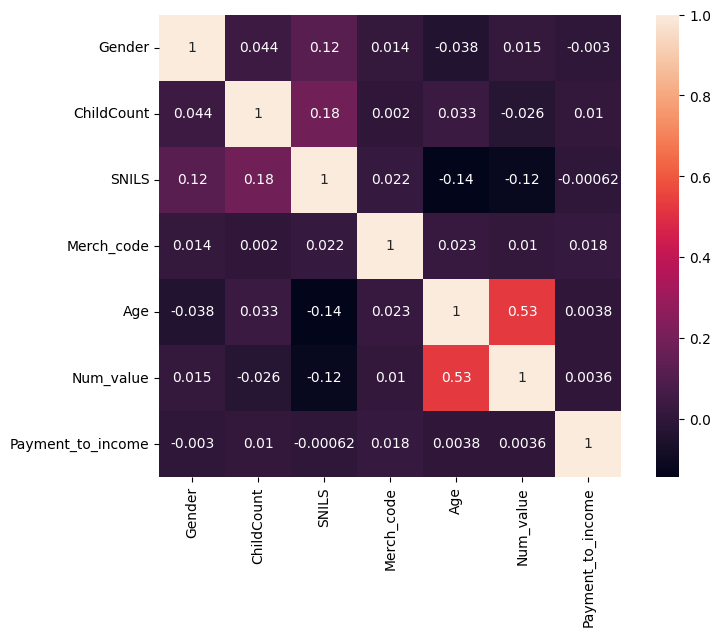

In [69]:
corr = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, vmax=1, square=True, annot=True)

corr

# обучаем модель catboost

In [75]:
from sklearn.model_selection import train_test_split
banks = ['BankA_decision',
        'BankB_decision',
        'BankC_decision',
        'BankD_decision',
        'BankE_decision']
# Разделение на признаки (X) и целевую переменную (y)
X = df.drop(banks, axis=1)
y = df[banks[0]]

# Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [79]:
from catboost import Pool
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

categorical columns:	  ['education', 'employment status', 'Value', 'Position', 'Family status', 'Goods_category', 'Carier_Level'] 
 len =  7
numerical columns:	  ['Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Age', 'Num_value', 'Payment_to_income'] 
 len =  7
Learning rate set to 0.112271
0:	learn: 0.9799801	test: 0.9779425	best: 0.9779425 (0)	total: 174ms	remaining: 2m 53s
1:	learn: 0.8923031	test: 0.8894548	best: 0.8894548 (1)	total: 270ms	remaining: 2m 14s
2:	learn: 0.8225271	test: 0.8190172	best: 0.8190172 (2)	total: 370ms	remaining: 2m 3s
3:	learn: 0.7673371	test: 0.7634475	best: 0.7634475 (3)	total: 414ms	remaining: 1m 43s
4:	learn: 0.7248855	test: 0.7205780	best: 0.7205780 (4)	total: 453ms	remaining: 1m 30s
5:	learn: 0.6878545	test: 0.6831347	best: 0.6831347 (5)	total: 537ms	remaining: 1m 29s
6:	learn: 0.6560887	test: 0.6519051	best: 0.6519051 (6)	total: 706ms	remaining: 1m 40s
7:	learn: 0.6291873	test: 0.6247081	best: 0.6247081 (7)	total: 812ms	remaining: 1m 40s
8:	learn: 0.6

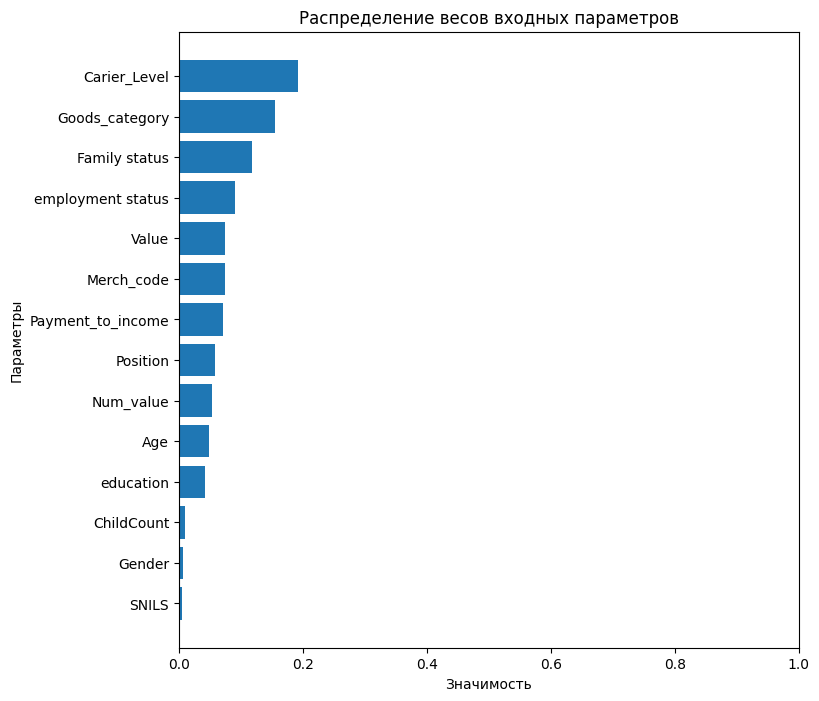

In [80]:
cat_features, _ = cat_num_split(X)

# Готовим Pool для Catboost
train_data = Pool(
    data=X_train,
    label=y_train,
    cat_features=cat_features,
    feature_names=features_names
)
eval_data = Pool(
    data=X_test,
    label=y_test,
    cat_features=cat_features,
    feature_names=features_names
)

model = CatBoostClassifier()


model.fit(X=train_data, eval_set=eval_data)


ftr_imp = model.feature_importances_/np.sum(model.feature_importances_)
sorted = np.argsort(ftr_imp)
ypos = np.arange(len(np.array(features_names)))
fig = plt.figure(figsize=(8, 8))
plt.barh(ypos, ftr_imp[sorted])
plt.xlim([0, 1])
plt.title('Распределение весов входных параметров')
plt.ylabel('Параметры')
plt.xlabel('Значимость')
plt.yticks(ypos, np.array(features_names)[sorted]);
plt.show()

# Тестирование моделей на почищенном датасете

In [113]:
df = pd.read_csv(
    filepath_or_buffer='cleared_df.csv',
    sep=';',
    index_col='SkillFactory_Id',
    parse_dates=['BirthDate', 'JobStartDate'])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6603 entries, 1.0 to 8787.0
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          6603 non-null   datetime64[ns]
 1   education          6603 non-null   object        
 2   employment status  6603 non-null   object        
 3   Value              6603 non-null   object        
 4   JobStartDate       6603 non-null   datetime64[ns]
 5   Position           6603 non-null   object        
 6   MonthProfit        6603 non-null   float64       
 7   MonthExpense       6603 non-null   float64       
 8   Gender             6603 non-null   float64       
 9   Family status      6603 non-null   object        
 10  ChildCount         6603 non-null   float64       
 11  SNILS              6603 non-null   float64       
 12  BankA_decision     6603 non-null   object        
 13  BankB_decision     6603 non-null   object        
 14  Ba

In [115]:
df.head()

,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,Family status,ChildCount,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
SkillFactory_Id,,,,,,,,,,,,,,,,,,,,,
1.0,1988-07-21,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01,начальник п,180000.0,90000.0,0.0,Никогда в браке не состоял(а),0.0,0.0,success,success,success,success,denied,77.0,137000.0,18.0,Furniture
2.0,1998-01-16,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01,директор,200000.0,60000.0,0.0,Никогда в браке не состоял(а),0.0,0.0,success,denied,success,denied,success,27.0,33000.0,6.0,Fitness
3.0,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),0.0,0.0,denied,denied,success,success,success,19.0,165000.0,24.0,Medical_services
4.0,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),0.0,0.0,success,denied,success,success,success,34.0,67000.0,12.0,Education
5.0,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),0.0,0.0,success,denied,success,success,success,75.0,36000.0,6.0,Furniture


<ipython-input-116-af94f2ec705e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,Merch_code,Loan_amount,Loan_term
MonthProfit,1.000000,0.383227,0.005056,-0.135435,-0.046841,-0.000929,0.007741,0.003550
MonthExpense,0.383227,1.000000,0.010219,0.079605,0.137536,-0.001799,-0.006435,-0.011478
Gender,0.005056,0.010219,1.000000,0.008755,0.014338,-0.004574,0.001872,-0.000892
ChildCount,-0.135435,0.079605,0.008755,1.000000,0.154383,-0.004598,-0.000806,0.003418
SNILS,-0.046841,0.137536,0.014338,0.154383,1.000000,0.002070,-0.012278,-0.014354
Merch_code,-0.000929,-0.001799,-0.004574,-0.004598,0.002070,1.000000,0.016864,0.014234
Loan_amount,0.007741,-0.006435,0.001872,-0.000806,-0.012278,0.016864,1.000000,0.961031
Loan_term,0.003550,-0.011478,-0.000892,0.003418,-0.014354,0.014234,0.961031,1.000000


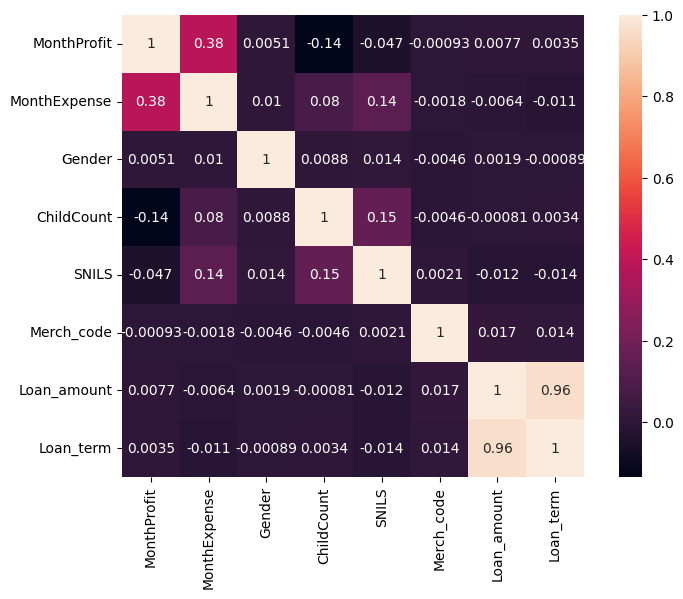

In [116]:
corr = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, vmax=1, square=True, annot=True)

corr

In [117]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['education', 'employment status', 'Value', 'Position', 'Family status', 'BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision', 'Goods_category'] 
 Число столблцов =  11
Числовые данные:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_amount', 'Loan_term'] 
 Число столблцов =  10


In [121]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [136]:
df['BankA_decision'].replace('denied', 0, inplace=True)
df['BankA_decision'].replace('success', 1, inplace=True)
df['BankA_decision'].replace('error', -1, inplace=True)

In [137]:
df = df[df.BankA_decision >= 0]

In [138]:
# Подготовка данных
X = df.drop(['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision'], axis=1)
y = df['BankA_decision']

In [139]:
# Преобразование категориальных переменных в числовые
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [141]:
# Обучение модели
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [142]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

In [144]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.739097169089518


[[ 14 302]
 [ 39 952]]


Text(50.722222222222214, 0.5, 'True')

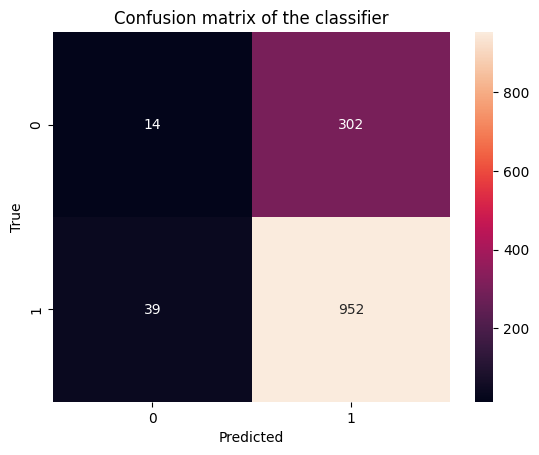

In [143]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.04      0.08       316
           1       0.76      0.96      0.85       991

    accuracy                           0.74      1307
   macro avg       0.51      0.50      0.46      1307
weighted avg       0.64      0.74      0.66      1307



In [146]:
df = pd.read_csv(
    filepath_or_buffer='cleared_df.csv',
    sep=';',
    index_col='SkillFactory_Id',
    parse_dates=['BirthDate', 'JobStartDate'])

In [147]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['education', 'employment status', 'Value', 'Position', 'Family status', 'BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision', 'Goods_category'] 
 Число столблцов =  11
Числовые данные:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_amount', 'Loan_term'] 
 Число столблцов =  10


In [149]:
df['BankA_decision'].replace('denied', 0, inplace=True)
df['BankA_decision'].replace('success', 1, inplace=True)
df['BankA_decision'].replace('error', -1, inplace=True)
df = df[df.BankA_decision >= 0]

X = df.drop(['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision'], axis=1)
y = df['BankA_decision']

encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [150]:
from sklearn.linear_model import LogisticRegression

In [153]:

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7582249426166794


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       316
           1       0.76      1.00      0.86       991

    accuracy                           0.76      1307
   macro avg       0.38      0.50      0.43      1307
weighted avg       0.57      0.76      0.65      1307



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0 316]
 [  0 991]]


Text(50.722222222222214, 0.5, 'True')

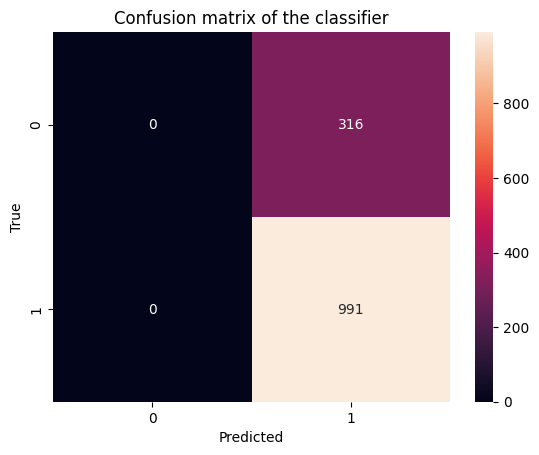

In [155]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')